In [12]:
# Train monthly models separately based on 'month' feature

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# ===== Load cleaned dataset =====
data_path = "../CleanDeta/order_full_cleaned.csv"
df = pd.read_csv(data_path)


In [13]:
# ===== Ensure binary label column exists =====
df['is_delayed'] = df['delay_days'].apply(lambda x: 1 if x > 1 else 0)

Month 01 model saved → rf_model_month_01.joblib

Month 01 Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1803
           1       0.67      0.65      0.66        77

    accuracy                           0.97      1880
   macro avg       0.83      0.82      0.82      1880
weighted avg       0.97      0.97      0.97      1880



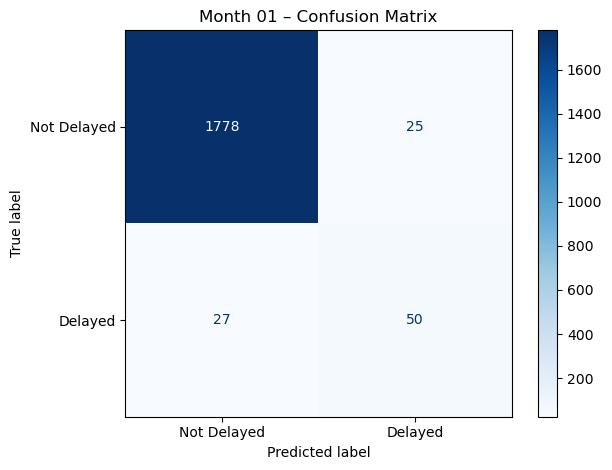

Month 02 model saved → rf_model_month_02.joblib

Month 02 Performance
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1766
           1       0.82      0.85      0.83       203

    accuracy                           0.96      1969
   macro avg       0.90      0.91      0.91      1969
weighted avg       0.97      0.96      0.97      1969



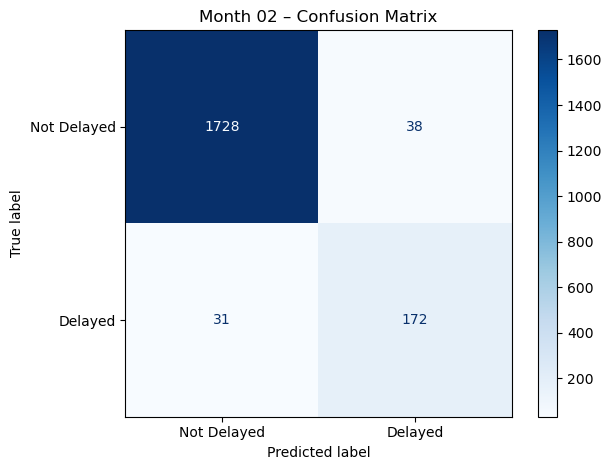

Month 03 model saved → rf_model_month_03.joblib

Month 03 Performance
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2010
           1       0.80      0.77      0.79       287

    accuracy                           0.95      2297
   macro avg       0.89      0.87      0.88      2297
weighted avg       0.95      0.95      0.95      2297



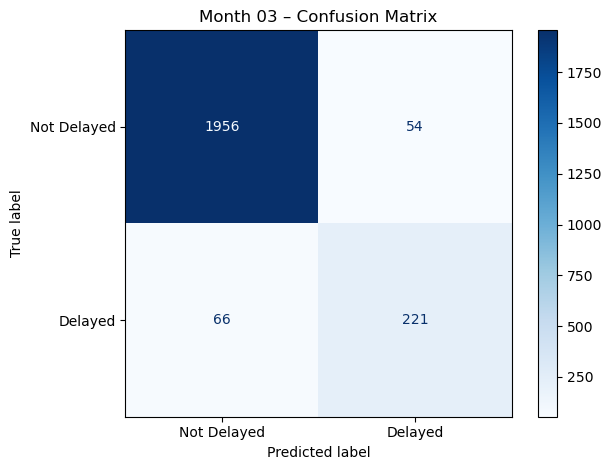

Month 04 model saved → rf_model_month_04.joblib

Month 04 Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2095
           1       0.77      0.55      0.64        73

    accuracy                           0.98      2168
   macro avg       0.88      0.77      0.81      2168
weighted avg       0.98      0.98      0.98      2168



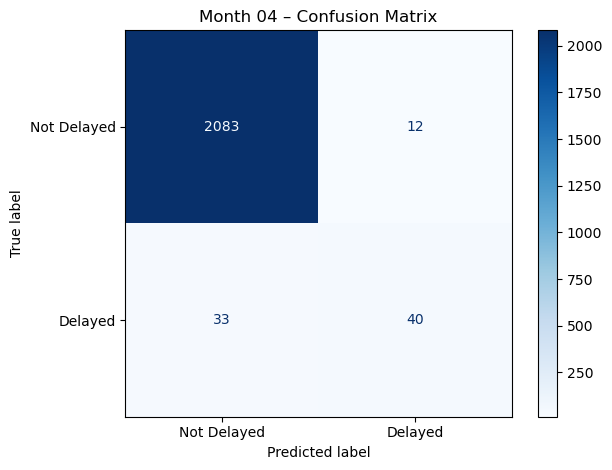

Month 05 model saved → rf_model_month_05.joblib

Month 05 Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2384
           1       0.75      0.62      0.68       100

    accuracy                           0.98      2484
   macro avg       0.87      0.81      0.83      2484
weighted avg       0.97      0.98      0.98      2484



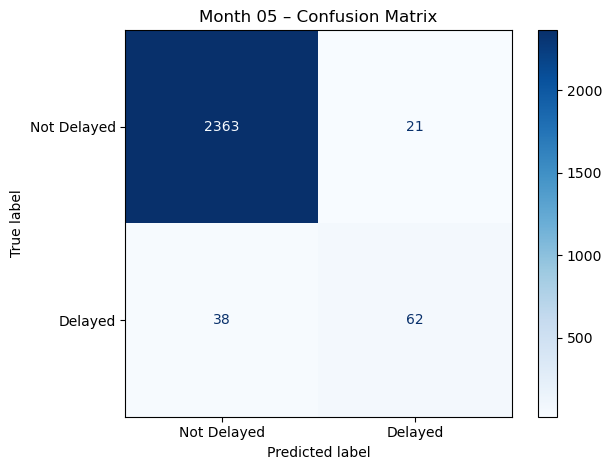

Month 06 model saved → rf_model_month_06.joblib

Month 06 Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2185
           1       0.73      0.62      0.67        26

    accuracy                           0.99      2211
   macro avg       0.86      0.81      0.83      2211
weighted avg       0.99      0.99      0.99      2211



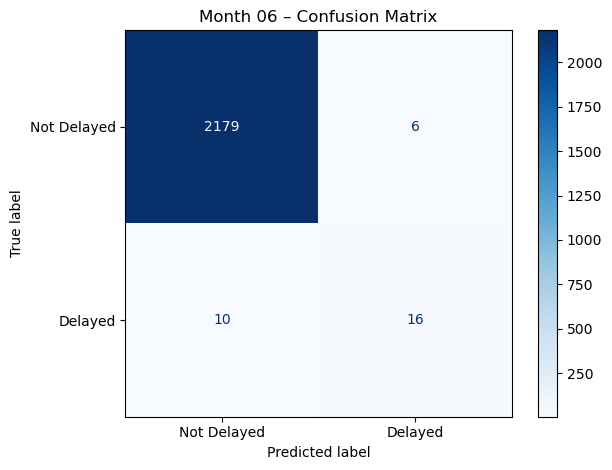

Month 07 model saved → rf_model_month_07.joblib

Month 07 Performance
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2335
           1       0.86      0.66      0.74        64

    accuracy                           0.99      2399
   macro avg       0.92      0.83      0.87      2399
weighted avg       0.99      0.99      0.99      2399



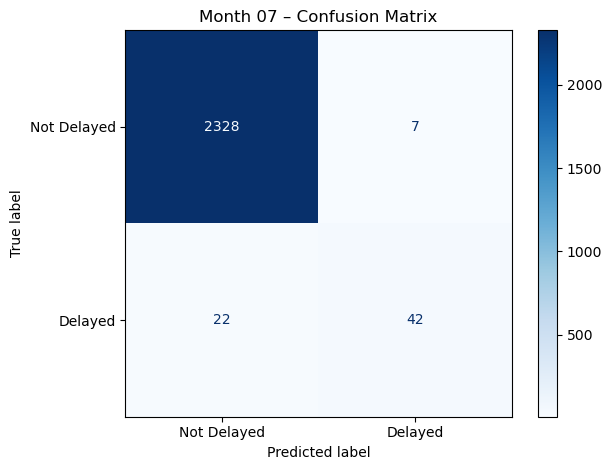

Month 08 model saved → rf_model_month_08.joblib

Month 08 Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2414
           1       0.70      0.41      0.51        79

    accuracy                           0.98      2493
   macro avg       0.84      0.70      0.75      2493
weighted avg       0.97      0.98      0.97      2493



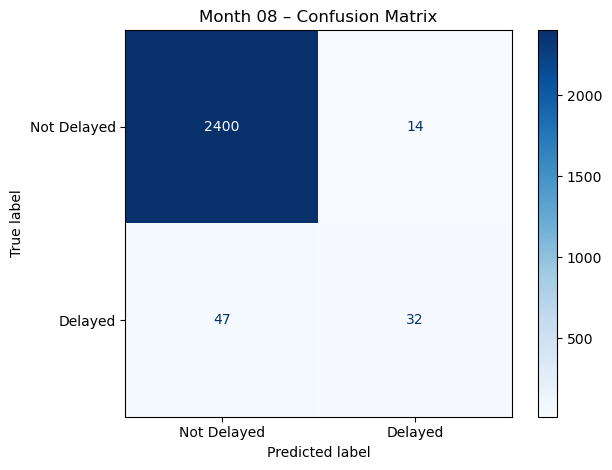

Month 09 model saved → rf_model_month_09.joblib

Month 09 Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       970
           1       0.81      0.54      0.65        39

    accuracy                           0.98      1009
   macro avg       0.89      0.77      0.82      1009
weighted avg       0.97      0.98      0.98      1009



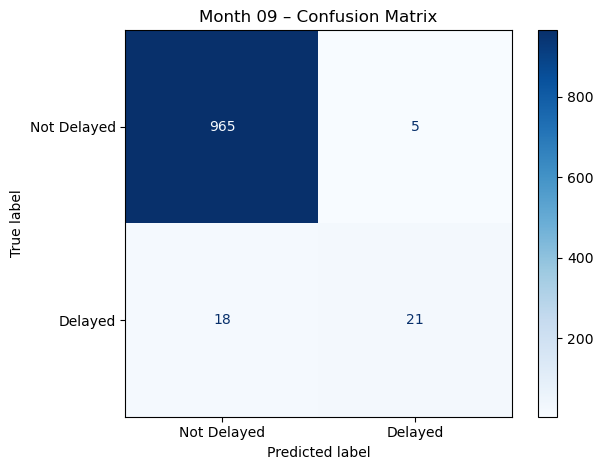

Month 10 model saved → rf_model_month_10.joblib

Month 10 Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1133
           1       0.57      0.37      0.45        35

    accuracy                           0.97      1168
   macro avg       0.77      0.68      0.72      1168
weighted avg       0.97      0.97      0.97      1168



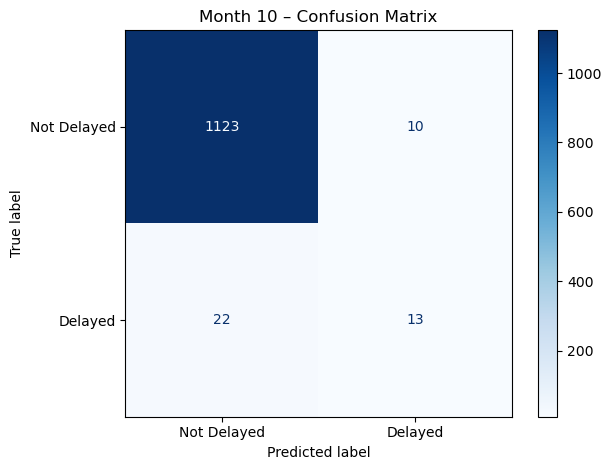

Month 11 model saved → rf_model_month_11.joblib

Month 11 Performance
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1584
           1       0.84      0.78      0.81       194

    accuracy                           0.96      1778
   macro avg       0.91      0.88      0.89      1778
weighted avg       0.96      0.96      0.96      1778



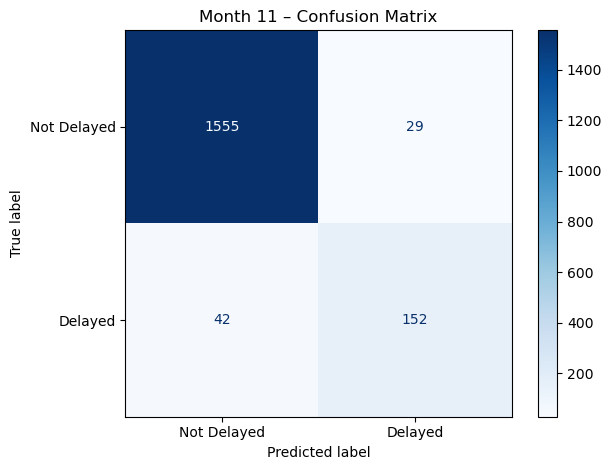

Month 12 model saved → rf_model_month_12.joblib

Month 12 Performance
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1229
           1       0.85      0.83      0.84        66

    accuracy                           0.98      1295
   macro avg       0.92      0.91      0.92      1295
weighted avg       0.98      0.98      0.98      1295



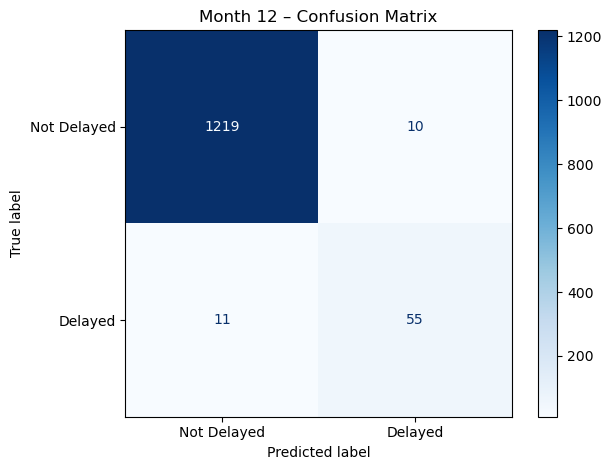

In [17]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

features = ['shipping_days', 'freight_value', 'price', 'payment_value']

for month in sorted(df['month'].dropna().unique()):
    # —— 按月筛数据 —— 
    df_month = df[df['month'] == month] \
                 .dropna(subset=features + ['is_delayed'])
    X = df_month[features]
    y = df_month['is_delayed']

    # —— 划分训练/测试 —— 
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # —— 训练模型 —— 
    model = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    )
    model.fit(X_train, y_train)

    # —— 保存模型 —— 
    fname = f"rf_model_month_{int(month):02d}.joblib"
    joblib.dump(model, fname)
    print(f"Month {month:02d} model saved → {fname}")

    # —— 评估 & 可视化 —— 
    y_pred = model.predict(X_test)
    print(f"\nMonth {month:02d} Performance")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Not Delayed", "Delayed"]
    )
    disp.plot(cmap="Blues")
    plt.title(f"Month {month:02d} – Confusion Matrix")
    plt.grid(False)
    plt.tight_layout()
    plt.show()
